In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# your Twitter API key and API secret & Microsoft Azure API Credentials
consumerKey = os.getenv("twitter_api_key")
consumerSecret = os.getenv("twitter_secret_api_key")
accessToken = os.getenv("twitter_access")
accessTokenSecret = os.getenv("twitter_access_secret")

# authenticate
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
#Sentiment Analysis
def  percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  $DIS -Retweet
Please enter how many tweets to analyze:  100


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  41
negative number:  12
neutral number:  47


In [5]:
tweet_list

,0
0,RT @RichLightShed: $10 mm 🤣🤣🤣 $DIS \n\n$100 mm...
1,RT @Jake__Wujastyk: $DIS #DIS The anchored VWA...
2,RT @MckayThomason: My friend told me he was go...
3,$DIS / $SPY is going to be interesting next week.
4,@tfinancialcloud $DIS for the long term decade...
...,...
95,RT @thatstocksgirl: This weeks watch list: \n\...
96,12/6-12/10 weekly recap (+756% realized)\n\n$A...
97,RT @JustinPulitzer: 🆕WEEKEND VIDEO 12/12: http...
98,"Hey, check out this server of real traders hel..."


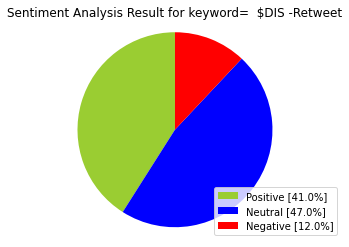

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
#columns= ["pos", "neu", "neg"]

In [8]:
#sizes = [positive, neutral, negative]

In [9]:
#x=pd.DataFrame(sizes, columns)

In [10]:
x = pd.DataFrame({"pos": [positive],
                   "neu": [neutral],
                   "neg": [negative]},
                  index=[keyword])

In [11]:
x.head()

,pos,neu,neg
$DIS -Retweet,41.0,47.0,12.0
